# Funciones

Las funciones son bloques fundamentales de los programas de Python que nos permiten reutilizar trozos de código. Para definirlas utilizamos `def`

In [ ]:
def add(x, y):
    return x + y

En la cabecera de la función (lo que definimos entre `def` y `:`) especificamos el nombre de la función y de los parámetros. El cuerpo de la función es una secuencia de declaraciones que se ejecutan cuando se llama a la función. Para ello, simplemente escribimos el nombre de la función seguido de los argumentos incluidos entre paréntesis

In [ ]:
a = add(2, 3)

Si queremos que nuestra función devuelva un valor, utilizamos el comando `return`, que puede aparecer varias veces en el cuerpo de una función. Para devolver varios valores, podemos utilizar tuplas.

In [ ]:
def foo():
    return "bar", "baz"

In [ ]:
a, b = foo()
print(a, b)

bar baz


Cuando la ejecución de una función termina sin encontrar ningún return, ésta devuelve `None`.

:::{exercise}
:label: functions-def

Escribe una función `count_even` que acepte un argumento llamado `numbers`,  que será un iterable que contenga enteros, y devuelva cúantos son pares.  

:::

:::{solution} functions-def
:class: dropdown

```
def count_even(numbers):
    l = len([x for x in numbers if x % 2 == 0])
    return l
```

```
>>> count_even([2, 3, 4, 5, 6, -2])
4
```

:::


---
## Argumentos por defecto

Podemos incluir valores por defecto en los parámetros de nuestras funciones mediante asignaciones que se realizan en la cabecera de la misma.

In [ ]:
def f(a, b=3):
    print(a)
    print(b)

In [ ]:
f(a=2)

2
3


In [ ]:
f(a=2, b=1)

2
1


Cuando en una función definimos un parámetro con un valor por defecto, ese parámetro y todos los que le siguen son opcionales. De este modo, **es un error de sintaxis especificar un parámetro sin valor por defecto después de un parámetro con uno**. Por ejemplo,

In [ ]:
def f(a, b, c=1, d):
    pass

SyntaxError: ignored

Otra cosa importante es que **los valores por defecto se evalúan cuando se define la función, no cuando la función se llama**. Mira este ejemplo

In [ ]:
def f(x, items=[]):
    items.append(x)
    return items

a = f(1)
b = f(2)
c = f(3)
print(c)

[1, 2, 3]


Por ello, es altamente recomendable usar *None* en los parámetros *vacíos o desconocidos* de nuestras funciones e incluir una comprobación.  

In [ ]:
def f(x, items=None):
    if items is None:
        items = []
    items.append(x)
    return items

a = f(1)
b = f(2)
c = f(3)
print(c)

[3]


---
## Argumentos variacionales

Una función en Python puede aceptar **un número variable** de argumentos si un asterisco `*` se utiliza antes del nombre de una variable, que por convenio suele denominarse `*args`. Por ejemplo

In [ ]:
def product(first, *args):
    result = first
    for x in args:
        result = result * x
    return result

In [ ]:
product(10, 20)

200

In [ ]:
product(10, 20, 5)

1000

En este caso, todos los argumentos extra se localizan en la variable `args` como una tupla. Podemos por lo tanto trabajar con los argumentos utilizando las operaciones estándar de secuencias: iteración, slicing, desempaquetado etc.

---
## Argumentos nombrados y posicionales

Los argumentos de las funciones también pueden nombrarse explícitamente para cada parámetro cuando son invocadas, además en ese caso el orden de los argumentos no importa siempre que cada uno tome **un único valor**

In [ ]:
def f(w, x, y, z):
    pass

Podemos llamarla como `f(x=3, y=22, w="foo", z=[1, 2])` y alterar el orden. Los argumentos en los que explicitamos el nombre son denominados **argumentos nombrados** y el resto **argumentos posicionales**. Si combinamos ambos, tendremos que tener en cuenta que los posicionales deben ir siempre primero y que ningún argumento reciba más de un valor. Por ejemplo

In [ ]:
# ✅
f("foo", 3, z=[1, 2], y=22)

In [ ]:
# ❌
f(3, 22, w="foo", z=[1, 2])

TypeError: ignored

Podemos obligar al uso de argumentos nombrados en nuestras funciones añadiendo argumentos tras un asterisco `*`. Por ejemplo

In [ ]:
def product(first, *args, scale=1):
    result = first * scale
    for x in args:
        result = result * x
    return result

In [ ]:
def read_data(filename, *, debug=False):
    pass

In [ ]:
data = read_data("Data.csv", True)

TypeError: ignored

In [ ]:
data = read_data("Data.csv", debug=True)

---
## Argumentos variacionales nombrados
Si el último argumento de una función tiene el prefijo `**`, todos los argumentos nombrados que no coincidan con los anteriormente definidos se guardarán en un diccionario que se pasa a la función, que por convenio suele llamarse `kwargs`.

In [ ]:
def make_table(data, **kwargs):

    font_color = kwargs.pop("font_color", "black")
    bg_color = kwargs.pop("bg_color", "white")
    width = kwargs.pop("width", None)
    # otros argumentos...
    if kwargs:
        # lanza un error si hay otras configuraciones
        pass

Combinando el uso de `*` y `**` podemos escribir funciones que aceptan cualquier combinatión de argumentos. Los argumentos posicionales son pasado como una tupla y los nombrados como un diccionario

In [ ]:
def f(*args, **kwargs):
    print(args)
    print(kwargs)

In [ ]:
f(3, 2, a="foo", debug=False)

(3, 2)
{'a': 'foo', 'debug': False}


Es posible pasar los argumentos a una función en formato de tupla o diccionario usando `*` y `**` respectivamente

In [ ]:
def f(x, y, z):
    pass

s = (1, "foo", [0, 1])

d = {
    "x": 1,
    "y": "foo",
    "z": [0, 1]
}

f(*s)
f(**d)

:::{exercise}
:label: functions-recursive

Dado un entero positivo $n$, consideremos la siguiente función

$$
f(n) =  \begin{cases}
      n / 2, & \text{si }\ n\text{ es par} \\
      3n + 1, & \text{en caso contrario.}
\end{cases}
$$

Definimos **la órbita de $n$** como el conjunto de enteros que se obtienen al aplicar reiteradamente $f$ hasta obtener 1. Escribe una función `collatz` que acepte un número arbitrario de enteros y devuelva un diccionario donde las claves sean los enteros y los valores listas con sus correspondientes órbitas.

> La [Conjetura de Collatz](https://en.wikipedia.org/wiki/Collatz_conjecture) propone que todo entero tiene una órbita finita.

:::

:::{solution} functions-recursive
:class: dropdown

```
def compute_orbit(n):
    l = []
    while n > 1:
        l.append(n)
        if n % 2 == 0:
            n = n // 2
        else:
            n = 3*n + 1
    l.append(1)
    return l

def collatz(*args):
    ret = {n:compute_orbit(n) for n in args}
    return ret
```

:::


---
## Nombres, Documentación e indicaciones de tipado

La convención estándar para nombrar funciones es utilizar *snake_case*, al igual que en las variables. Si se pretende que una función no sea utilizada directamente, si no que implementa algún tipo de detalle interno en nuestro programa, se suele empezar el nombre de la variable por un guión bajo.

Como todo lo que definimos en Python, **las funciones también son objetos**, y tienen una serie de atributos que es importante conocer.

In [ ]:
def square(x):
    return x * x

El nombre de la función queda guardado en el atributo `__name__`.

In [ ]:
square.__name__

'square'

Es común que la primera expresión que aparece en una función sea una cadena describiendo su uso. Por ejemplo,

In [ ]:
def factorial(n):
    """
    Calcula el factorial de n. Por ejemplo,

    >>> factorial(6)
    120
    """
    if n <= 1:
        return 1
    else:
        return n*factorial(n-1)

La variable de tipo `str` que guarda la documentación está en el atributo `__doc__` de la función. A menudo es consultado por jupyter o IDEs para mostrarla al usuario.

In [ ]:
print(factorial.__doc__)


    Calcula el factorial de n. Por ejemplo, 

    >>> factorial(6)
    120
    


> Python soporta **funciones recursivas**, es decir, funciones que se llaman a sí mismas. `factorial` es un ejemplo de función recursiva.

También se pueden realizar anotaciones sobre el tipado de los argumentos y del valor a devolver por la función. Como ya vimos, este tipo de indicaciones **son totalmente ignoradas por el intérprete de Python**, solo sirven para herramientas como [pylint](https://pylint.pycqa.org/en/latest/) que comprueban la consistencia de nuestro código sin ejecutarlo.

In [ ]:
def factorial(n: int) -> int:
    if n <= 1:
        return 1
    else:
        return n * factorial(n - 1)

Esta información queda guardada en forma de diccionario en el atributo `__annotations__`.

In [ ]:
factorial.__annotations__

{'n': int, 'return': int}

---
## Llamadas a la función y alcance

Cuando definimos una función, Python crea los objetos definidos en los parámetros por defecto y las respectivas variables en el espacio de nombres local de la función que apuntan a los mismos.

In [ ]:
def init_foo():
    print("foo")
    return 0

In [ ]:
def f(arg1=1, arg2=init_foo()):
    print(a, b)

foo


In [ ]:
arg1

NameError: ignored

Cuando se realiza una llamada a una función, los parámetros (por defecto o no) pasan a ser variables que apuntan a los objetos de entrada de la función. Python crea estas referencias directamente, **sin realizar ningún tipo de copiado**, por ello hay que tener especial precaución con los objetos mutables que se pasan en la llamada de una función.  

In [ ]:
def square(items):
    for i, x in enumerate(items):
        items[i] = x * x
    return items

In [ ]:
a = [1, 2, 3, 4, 5]
square(a)

[1, 4, 9, 16, 25]

In [ ]:
a

[1, 4, 9, 16, 25]

Las funciones que mutan los objetos de entrada o que cambian el estado de otras partes del programa, se dice que tienen *side effects*. Un indicardor importante para identificarlas es que normalmente estas funciones no devuelven ningún valor. Se puede evitar este tipo de comportamiento en las funciones reasignando el nombre de la variable local.

In [ ]:
def square_nse(items):
    # Nada de side-effects
    items = [x * x for x in items]
    return items

In [ ]:
a = [1, 2, 3, 4, 5]
square(a)

[1, 4, 9, 16, 25]

In [ ]:
a

[1, 2, 3, 4, 5]

Cada vez que ejecutamos una función se crea **un espacio de nombres local**, que es un entorno que contiene el nombre y los valores de los parámetros de la fucnión así como variables que son asignadas dentro de la función. Las variables no definidas en el espacio local de una función son buscadas de forma dinámica (es decir, durante la ejecución de la función cuando es llamada) en el espacio global de nombres.

En este contexto son dos los tipos de errores que nos podemos encontrar
- `UnboundedLocalError`: variable local que todavía no ha sido asignada.
- `NameError`: se menciona una variable que no está ni el espacio de nombres local ni global.


Considera los siguientes ejemplos

In [ ]:
def f():
    n = n + 1

f()

UnboundLocalError: ignored

In [ ]:
def g():
    print(non_defined_var)

g()

NameError: ignored

In [ ]:
global_var = "foo"
def h():
    print(global_var)

h()

foo


Las variables definidas dentro de las funciones (incluidos los parámetros) tienen un *scope* o alcance que restringe su acceso a la definición de la función. Por ello cuando un nombre aparece tanto en el espacio de nombres local como global, su valor depende del *scope* del mismo.

In [ ]:
x = 42
def f():
    x = 13
    print(x)

f()
print(x)

13
42


Si dentro de una función queremos acceder al valor global de una variable utilizamos `global`

In [ ]:
x = 42
def f():
    global x
    x = 13
    print(x)

f()
print(x)

13
13


Python acepta funciones **recursivas**, es decir, funciones que se llaman a así mismas

In [ ]:
def fibonacci(n):
    if n > 1:
        return fibonacci(n-1) + fibonacci(n-2)
    return 1

---
## Funciones lambda


Se puden definir funciones **anónimas**, es decir, no tienen un nombre asignado, mediante las denominadas **expresiones lambda**, que tienen la siguiente sintaxis

```
lambda args: expression
```

donde `args` son parámetros separados por comas y `expression` es una expresión (una concatenación de operadores; no se realizan bucles, ni asignaciones etc). Por ejemplo

In [ ]:
a = lambda x, y: x + y

a(2, 3)

5

Las expresiones lambda son útiles cuando por ejemplo pasemos una función como parámetro a una función de orden superior.

:::{exercise}
:label: functions-lambda

Pasa una función lambda al parámetro `key` [del método `sort`](https://docs.python.org/3/library/stdtypes.html#list) para ordenar una lista (de menor a mayor) de cadenas por order alfabético pero empezando por el último elemento de la cadena. Por ejemplo

```
["foo", "bar", "baz"] -> ["baz", "bar", "foo"]
```

:::

---
## Map, Filter, Reduce

Python soporta lo que se denomina el concepto de **funciones de orden superior**. Esto significa que podemos usar funciones como argumentos de otras funciones, almacenarlas en estructuras de datos, devolver una función en una función etc. Considera el siguiente ejemplo

In [ ]:
import time

def after(seconds, f):
    time.sleep(seconds)
    f()

def foo():
    print("Foo!")

after(10, foo)

Foo!


En este contexto, Python incorporta algunas funciones que nos permiten trabajar con funciones y que son la base de las expresiones de comprensión. Por un lado tenemos `filter` para filtrar según una función que devuelva un booleano y `map` para aplicar una función a un iterable.

In [ ]:
nums = list(range(11))
filt = filter(lambda x: x%3 == 0, nums)
squares = map(lambda x: x*x, nums)

In [ ]:
type(filt)

filter

In [ ]:
type(squares)

map

Tanto `filter` como `map` devuelven **generadores**.

Finalmente, existe la función `reduce` del módulo `itertools` para aplicar una función de dos parámetros a los objetos de un iterable de forma reiterada.

In [ ]:
from functools import reduce
nums = range(11)
total = reduce(lambda x, y: x + y, nums)
print(total)

55


La función reduce tiene un parámetro opcional `initial` por si queremos añadirlo al principio del iterable antes de ejecutar las evaluaciones de la función.

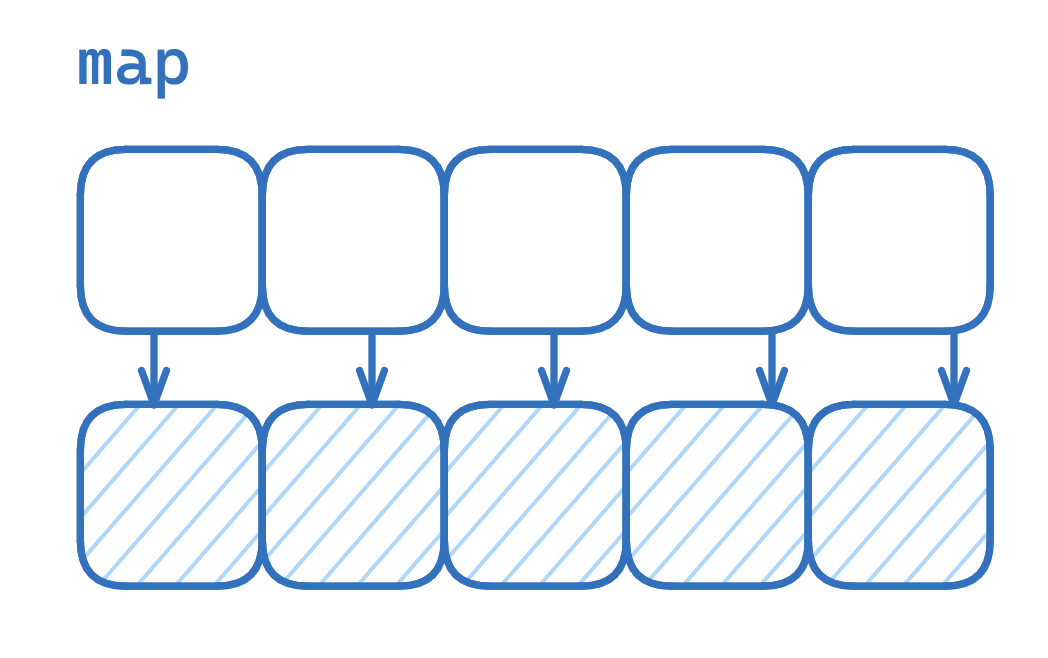

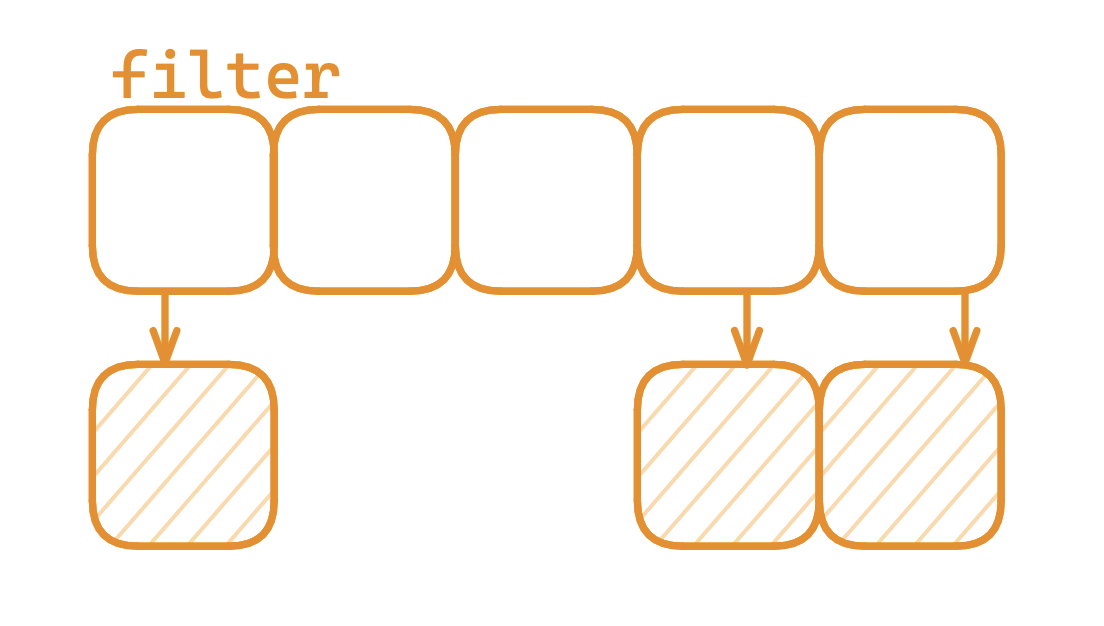

:::{exercise}
:label: functions-reduce

Utiliza `reduce` sobre un iterable para obtener

```
(((((None, 1), 2), 3), 4), 5)
```

:::

:::{exercise}
:label: functions-ret-a-function

Crea una función `wrapper` que tome como argumento una función y realice las siguientes tareas
- Escribir por pantalla el mensaje "Llamando a la función..."
- Ejecute al función
- Escriba otro mensaje "La función ha sido llamada"

:::

:::{exercise}
:label: functions-reduce-2

Implementa la función `reduce` por ti mismo.

:::

:::{solution} functions-reduce-2
:class: dropdown

```
def my_reduce(f, s):
    if len(s) == 1:
        return s[0]
    return f(s[0], reduce(f, s[1:]))
```

:::
